# Tensorflow Course
### Week 2
### Exercise 1

Build a MNIST model

Objectives:
* Uses a callback

In [30]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

1.13.1


In [8]:
# Load the data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Scale the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [44]:
# Set up the callback class

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [45]:
# Construct the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(1024, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1850 - acc: 0.9459
Epoch 2/100
60000/60000 [==============================] - 9s 146us/sample - loss: 0.0730 - acc: 0.9772
Epoch 3/100
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0486 - acc: 0.9844
Epoch 4/100
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0331 - acc: 0.9892
Epoch 5/100
59840/60000 [============================>.] - ETA: 0s - loss: 0.0252 - acc: 0.9917
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 9s 145us/sample - loss: 0.0252 - acc: 0.9917


In [22]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.0862 - acc: 0.9752


[0.08616431771242933, 0.9752]

In [24]:
classifications = model.predict(x_test)


In [25]:
classifications[0]

array([2.6342704e-12, 2.7646238e-11, 5.2153687e-10, 6.0019879e-08,
       1.5626388e-16, 2.3161358e-12, 1.1451196e-15, 9.9999964e-01,
       4.1355873e-12, 2.1193713e-07], dtype=float32)

In [29]:
np.where(classifications[0] == np.max(classifications[0]))

(array([7]),)

AxesImage(54,36;334.8x217.44)


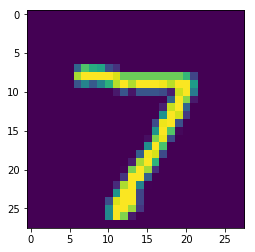

In [31]:
print(plt.imshow(x_test[0]))

In [36]:
def check_prediction(classifications, data, position):
    print(np.where(classifications[position] == np.max(classifications[position])))
    print(plt.imshow(data[position]))

(array([0]),)
AxesImage(54,36;334.8x217.44)


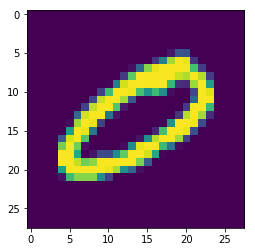

In [41]:
check_prediction(classifications, x_test, 9800)